In [ ]:
#pip install praw pydantic ollama

  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 293.1 kB/s eta 0:00:00a 0:00:01
Using cached websocket_client-1.8.0-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import praw

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

from pydantic import BaseModel, Field, ValidationError
from typing import Literal

import ollama

In [2]:
import logging
handler = logging.StreamHandler()
handler.setLevel(logging.DEBUG)
for logger_name in ("praw", "prawcore"):
    logger = logging.getLogger(logger_name)
    logger.setLevel(logging.DEBUG)
    logger.addHandler(handler)

In [3]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [4]:
client_id = os.getenv("REDDIT_CLIENT_ID")
client_secret = os.getenv("REDDIT_CLIENT_SECRET")


In [5]:
reddit = praw.Reddit(
client_id =client_id,
client_secret = client_secret,
user_agent='Windows:reddit_bitcoin_scraper:v1 (by /u/Critical_Product_103)',
)

In [19]:
posts_by_date = defaultdict(list)

In [20]:
start_date = '2025-03-25'
start_date = pd.to_datetime(start_date).tz_localize('UTC')

In [48]:
subreddits_of_interest = ["WallStreetBetsCrypto"]#, "WallStreetElite", "btc", "BitcoinBeginners", "BitcoinMining", "CryptoMarkets", "CryptoCurrency", "Bitcoin", "WallStreetBetsCrypto"]

In [49]:
subreddits = reddit.subreddit("+".join(subreddits_of_interest))

In [50]:
for post in subreddits.top(time_filter= "month", limit=None):
    post_date = pd.to_datetime(post.created_utc, unit='s', utc=True)

    if post_date > start_date:
        # Collect the details of the post without comments
        post_data = {
            "post_id": post.id,  # Post ID
            "title": post.title,
            "body": post.selftext if post.selftext else "No text body (link post)",
            "author": post.author.name if post.author else "Unknown",  # Post author
            "upvotes": post.ups,  # Number of upvotes
            "downvotes": post.downs,  # Number of downvotes
            "score": post.score,  # Post score (upvotes - downvotes)
            "num_comments": post.num_comments,  # Number of comments
            "url": post.url,  # URL of the post
            "created_at": post_date,  # Post creation date
            "subreddit": post.subreddit.display_name,  # Subreddit name
        }

        # Append to the respective date key
        posts_by_date[post_date].append(post_data)
    
    else:
        continue

Fetching: GET https://oauth.reddit.com/r/WallStreetBetsCrypto/top at 1743687157.327754
Data: None
Params: {'limit': 1024, 'raw_json': 1, 't': 'month'}
Response: 200 (59897 bytes) (rst-442:rem-954.0:used-46 ratelimit) at 1743687159.0684211
Fetching: GET https://oauth.reddit.com/r/WallStreetBetsCrypto/top at 1743687159.096769
Data: None
Params: {'after': 't3_1j68c4d', 'limit': 1024, 'raw_json': 1, 't': 'month'}
Response: 200 (63768 bytes) (rst-440:rem-953.0:used-47 ratelimit) at 1743687162.503273
Fetching: GET https://oauth.reddit.com/r/WallStreetBetsCrypto/top at 1743687162.5324612
Data: None
Params: {'after': 't3_1jkl326', 'limit': 1024, 'raw_json': 1, 't': 'month'}
Response: 200 (62335 bytes) (rst-437:rem-952.0:used-48 ratelimit) at 1743687164.322001
Fetching: GET https://oauth.reddit.com/r/WallStreetBetsCrypto/top at 1743687164.350035
Data: None
Params: {'after': 't3_1jejpk6', 'limit': 1024, 'raw_json': 1, 't': 'month'}
Response: 200 (69466 bytes) (rst-435:rem-951.0:used-49 ratelimit

In [51]:
df = pd.DataFrame([p for posts in posts_by_date.values() for p in posts])


In [52]:
print(posts_by_date)

defaultdict(<class 'list'>, {Timestamp('2025-03-31 11:46:16+0000', tz='UTC'): [{'post_id': '1jo18e9', 'title': 'Tesla is dead! sales outside of usa down 95 % in a year. Us market only not enough', 'body': 'new 52 weeks low within a month. we are getting there, dont listen to the stock gesticulation. below $50 within year in best case scenario. California is Us biggest market for Tesla, sales will be down there too for more than 75% within a year on rolling basis. These tesla sales abroad are gone and not coming', 'author': 'azavio', 'upvotes': 190, 'downvotes': 0, 'score': 190, 'num_comments': 18, 'url': 'https://www.reddit.com/r/WallStreetElite/comments/1jo18e9/tesla_is_dead_sales_outside_of_usa_down_95_in_a/', 'created_at': Timestamp('2025-03-31 11:46:16+0000', tz='UTC'), 'subreddit': 'WallStreetElite'}], Timestamp('2025-03-30 18:39:47+0000', tz='UTC'): [{'post_id': '1jnj98q', 'title': 'Trump announces that he\'s "not joking" about running for a third term. He says "there are methods

In [53]:
df

,post_id,title,body,author,upvotes,downvotes,score,num_comments,url,created_at,subreddit
0,1jo18e9,Tesla is dead! sales outside of usa down 95 % ...,new 52 weeks low within a month. we are gettin...,azavio,190,0,190,18,https://www.reddit.com/r/WallStreetElite/comme...,2025-03-31 11:46:16+00:00,WallStreetElite
1,1jnj98q,"Trump announces that he's ""not joking"" about r...",No text body (link post),YoloFortune,138,0,138,42,https://i.redd.it/3astnp3bgvre1.jpeg,2025-03-30 18:39:47+00:00,WallStreetElite
2,1jnjwen,The Trump Administration believes tariffs will...,No text body (link post),YoloFortune,106,0,106,196,https://v.redd.it/dnlh8of7lvre1,2025-03-30 19:07:26+00:00,WallStreetElite
3,1jprnvd,BREAKING 📰 Trump tells inner circle that Elon ...,No text body (link post),AlphaFlipper,106,0,106,55,https://i.redd.it/r3yok12pyfse1.jpeg,2025-04-02 15:38:30+00:00,WallStreetElite
4,1jphsag,Eric Trump says Bitcoin is one of the greatest...,No text body (link post),AlphaFlipper,77,0,77,51,https://v.redd.it/uugnj3hf4dse1,2025-04-02 06:05:18+00:00,WallStreetElite
...,...,...,...,...,...,...,...,...,...,...,...
1026,1jkb73i,Wallet review?,"Before you scald me, i’m not a trader or anyth...",marshallmathers23,0,0,0,11,https://i.redd.it/36er2p2581re1.jpeg,2025-03-26 13:00:33+00:00,WallStreetBetsCrypto
1027,1jngfxn,rate my wallet,Should I buy more xrp? Ill buy more xrp . I ne...,Excellent_Bit4635,0,0,0,59,https://i.redd.it/x7y4id0huure1.jpeg,2025-03-30 16:37:22+00:00,WallStreetBetsCrypto
1028,1jl29u6,"If my paper trade were real, I would be buying...",No text body (link post),KHYusri,0,0,0,12,https://i.redd.it/vqr91zon28re1.png,2025-03-27 12:02:17+00:00,WallStreetBetsCrypto
1029,1jky1yq,I know nothing about trading. Am I cooked or a...,No text body (link post),Apprehensive_View614,0,0,0,46,https://i.redd.it/xfd9r1sjk6re1.jpeg,2025-03-27 06:59:01+00:00,WallStreetBetsCrypto


In [54]:
df['date_created'] = df['created_at'].dt.date
df_sorted = df.sort_values(by=['date_created','created_at']).reset_index(drop=True)

In [55]:
df_sorted.value_counts('date_created')

date_created
2025-03-25    143
2025-03-26    125
2025-04-01    120
2025-03-27    115
2025-03-31    113
2025-04-02    112
2025-03-28    104
2025-03-29     99
2025-03-30     95
2025-04-03      5
Name: count, dtype: int64

In [58]:
df_sorted

,post_id,title,body,author,upvotes,downvotes,score,num_comments,url,created_at,subreddit,date_created
143,1jjyg7o,"Daily Crypto Discussion - March 26, 2025 (GMT+0)",**Welcome to the Daily Crypto Discussion threa...,CryptoDaily-,28,0,28,573,https://www.reddit.com/r/CryptoCurrency/commen...,2025-03-26 00:01:03+00:00,CryptoCurrency,2025-03-26
144,1jjylyx,Did you know? Bitcoin Cash has an algorithmic ...,No text body (link post),AD1AD,60,0,60,6,https://i.redd.it/l0hv9vc8exqe1.jpeg,2025-03-26 00:08:18+00:00,btc,2025-03-26
145,1jjyomf,Help recovering my Samourai Wallet?,A long time ago I had got myself some BTC in a...,haileliamen,2,0,2,22,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-03-26 00:11:46+00:00,BitcoinBeginners,2025-03-26
146,1jjypod,For More Content Check Out The Build-a-Mine Po...,No text body (link post),Adorable_Incident717,3,0,3,0,https://v.redd.it/x712pzkjexqe1,2025-03-26 00:13:07+00:00,btc,2025-03-26
147,1jjyq47,For More Content Check Out The Build-a-Mine Po...,No text body (link post),Adorable_Incident717,0,0,0,0,https://v.redd.it/x712pzkjexqe1,2025-03-26 00:13:41+00:00,BitcoinMining,2025-03-26
...,...,...,...,...,...,...,...,...,...,...,...,...
1026,1jq3w4z,"Daily Crypto Discussion - April 3, 2025 (GMT+0)",**Welcome to the Daily Crypto Discussion threa...,CryptoDaily-,28,0,28,440,https://www.reddit.com/r/CryptoCurrency/commen...,2025-04-03 00:00:45+00:00,CryptoCurrency,2025-04-03
1027,1jq3y9w,My crypto portfolio so far…,This is my crypto portfolio so far after a few...,Key_Let_5471,5,0,5,5,https://i.redd.it/2bbe20irgise1.jpeg,2025-04-03 00:03:17+00:00,WallStreetBetsCrypto,2025-04-03
1028,1jq51s7,METAMASK got wiped OFF,Hey Guys! I am literally shaking right now on ...,Forward-Current7263,125,0,125,196,https://www.reddit.com/r/CryptoCurrency/commen...,2025-04-03 00:55:39+00:00,CryptoCurrency,2025-04-03
1029,1jq73nv,Best exchange to buy and hold?,Hello community! Please tell me what your opin...,Lumpy_Agent7598,10,0,10,16,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-04-03 02:34:38+00:00,BitcoinBeginners,2025-04-03


In [59]:
model_name = "llama3.2"

def classify_post(title, body):
    prompt = f"Determine if this Reddit post is relevant to Bitcoin:\nTitle: {title}\nBody: {body}\nAnswer 'Yes' or 'No' only."
    response = ollama.chat(model=model_name, messages=[{"role": "user", "content": prompt}])
    print(response)
    return response["message"]["content"]

In [60]:
df_sorted['is_relevant'] = df_sorted.apply(lambda x: classify_post(x['title'], x['body']), axis=1)

model='llama3.2' created_at='2025-04-03T13:39:12.079549Z' done=True done_reason='stop' total_duration=8029093333 load_duration=1043527541 prompt_eval_count=717 prompt_eval_duration=4554207417 eval_count=99 eval_duration=2425353708 message=Message(role='assistant', content='This Reddit post is not directly related to Bitcoin, as it appears to be a general introduction to the r/CryptoCurrency community and its rules and guidelines for discussion topics. While Bitcoin is mentioned implicitly as part of the broader cryptocurrency category, there is no specific content related to Bitcoin in the post itself.\n\nHowever, users interested in Bitcoin can find relevant resources, such as links to beginner resources or other discussion threads on Bitcoin-related topics, which might be shared by mods or users in the community.', images=None, tool_calls=None)
model='llama3.2' created_at='2025-04-03T13:39:12.273943Z' done=True done_reason='stop' total_duration=176954792 load_duration=26233458 prompt

/var/folders/lk/jtg57k7555qg6vh9z23sx18m0000gn/T/ipykernel_86925/1868005291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['is_relevant'] = df_sorted.apply(lambda x: classify_post(x['title'], x['body']), axis=1)


In [61]:
df_sorted

,post_id,title,body,author,upvotes,downvotes,score,num_comments,url,created_at,subreddit,date_created,is_relevant
143,1jjyg7o,"Daily Crypto Discussion - March 26, 2025 (GMT+0)",**Welcome to the Daily Crypto Discussion threa...,CryptoDaily-,28,0,28,573,https://www.reddit.com/r/CryptoCurrency/commen...,2025-03-26 00:01:03+00:00,CryptoCurrency,2025-03-26,This Reddit post is not directly related to Bi...
144,1jjylyx,Did you know? Bitcoin Cash has an algorithmic ...,No text body (link post),AD1AD,60,0,60,6,https://i.redd.it/l0hv9vc8exqe1.jpeg,2025-03-26 00:08:18+00:00,btc,2025-03-26,No
145,1jjyomf,Help recovering my Samourai Wallet?,A long time ago I had got myself some BTC in a...,haileliamen,2,0,2,22,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-03-26 00:11:46+00:00,BitcoinBeginners,2025-03-26,Yes.
146,1jjypod,For More Content Check Out The Build-a-Mine Po...,No text body (link post),Adorable_Incident717,3,0,3,0,https://v.redd.it/x712pzkjexqe1,2025-03-26 00:13:07+00:00,btc,2025-03-26,No
147,1jjyq47,For More Content Check Out The Build-a-Mine Po...,No text body (link post),Adorable_Incident717,0,0,0,0,https://v.redd.it/x712pzkjexqe1,2025-03-26 00:13:41+00:00,BitcoinMining,2025-03-26,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,1jq3w4z,"Daily Crypto Discussion - April 3, 2025 (GMT+0)",**Welcome to the Daily Crypto Discussion threa...,CryptoDaily-,28,0,28,440,https://www.reddit.com/r/CryptoCurrency/commen...,2025-04-03 00:00:45+00:00,CryptoCurrency,2025-04-03,This Reddit post is not directly related to Bi...
1027,1jq3y9w,My crypto portfolio so far…,This is my crypto portfolio so far after a few...,Key_Let_5471,5,0,5,5,https://i.redd.it/2bbe20irgise1.jpeg,2025-04-03 00:03:17+00:00,WallStreetBetsCrypto,2025-04-03,No
1028,1jq51s7,METAMASK got wiped OFF,Hey Guys! I am literally shaking right now on ...,Forward-Current7263,125,0,125,196,https://www.reddit.com/r/CryptoCurrency/commen...,2025-04-03 00:55:39+00:00,CryptoCurrency,2025-04-03,No.
1029,1jq73nv,Best exchange to buy and hold?,Hello community! Please tell me what your opin...,Lumpy_Agent7598,10,0,10,16,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-04-03 02:34:38+00:00,BitcoinBeginners,2025-04-03,No


In [62]:
#df_filtered = df_sorted[df_sorted['is_relevant'].str.contains('Yes')]
#df_filtered = df_filtered.sort_values(by = 'created_at', ascending = True)
#want to select lower case yes or "indeed"
df_filtered = df_sorted[df_sorted['is_relevant'].str.contains('yes|indeed', case=False, regex=True)]
df_filtered = df_filtered.sort_values(by = 'created_at', ascending = True)

In [ ]:
#df_sorted['is_relevant'] = df_sorted.apply(lambda x: get_relevance(x['title'], x['body']), axis=1)

In [63]:
df_filtered

,post_id,title,body,author,upvotes,downvotes,score,num_comments,url,created_at,subreddit,date_created,is_relevant
145,1jjyomf,Help recovering my Samourai Wallet?,A long time ago I had got myself some BTC in a...,haileliamen,2,0,2,22,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-03-26 00:11:46+00:00,BitcoinBeginners,2025-03-26,Yes.
148,1jjyskb,Look what I can buy with my bitcoin gift card,No text body (link post),eagle_eye_johnson,0,0,0,9,https://v.redd.it/jzzzrr26jvqe1,2025-03-26 00:16:57+00:00,btc,2025-03-26,Yes
150,1jk0di6,Bitcoin is Still Misunderstood,No text body (link post),InclineDumbbellPress,1237,0,1237,193,https://i.redd.it/xllts9e2txqe1.png,2025-03-26 01:33:07+00:00,CryptoCurrency,2025-03-26,Yes
153,1jk0qkj,First US Engineered Hydro-Cooled Bitcoin Miner...,No text body (link post),btcxio,5,0,5,3,https://news.bitcoinprotocol.org/first-us-engi...,2025-03-26 01:51:18+00:00,BitcoinMining,2025-03-26,Yes
156,1jk33yu,You can remove money with only a send address?,"I may be crazy, but when I try to send Bitcoin...",Lonely_cricket143,36,0,36,23,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-03-26 03:56:00+00:00,BitcoinBeginners,2025-03-26,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1jpyypr,Jack Mallers explains Bitcoin in 30 mins,One of the best and most enthusiastic explanat...,Bubbly_Ice3836,191,0,191,10,https://x.com/TFTC21/status/1894820980297519565,2025-04-02 20:29:39+00:00,Bitcoin,2025-04-02,Yes
1014,1jq1g1h,Bear Market,Trump just signed the tarrifs on middle east c...,CurrentAd8334,16,0,16,63,https://www.reddit.com/r/CryptoMarkets/comment...,2025-04-02 22:11:43+00:00,CryptoMarkets,2025-04-02,Yes.
1015,1jq1gbt,Algorand currently has $410 million worth of s...,No text body (link post),gigabyteIO,154,0,154,22,https://app.rwa.xyz/stocks,2025-04-02 22:12:02+00:00,CryptoCurrency,2025-04-02,Yes
1020,1jq2gq5,"They’re Shaking You Out—Stay Strong, Don’t Sell",As Tom Petty said—it’s free fallin’. Hold your...,AncientKey1976,77,0,77,147,https://www.reddit.com/r/CryptoMarkets/comment...,2025-04-02 22:56:11+00:00,CryptoMarkets,2025-04-02,Yes


In [64]:
len(df_filtered)

358

In [65]:
df_filtered['date_created'] = pd.to_datetime(df_filtered['date_created'])

iso_calendar = df_filtered['date_created'].dt.isocalendar()
df_filtered['year'] = iso_calendar.year  # Use ISO year instead of dt.year
df_filtered['week'] = iso_calendar.week
df_filtered['day'] = df_filtered['date_created'].dt.dayofweek

heatmap_data = df_filtered.groupby(['year', 'week', 'day']).size().unstack()

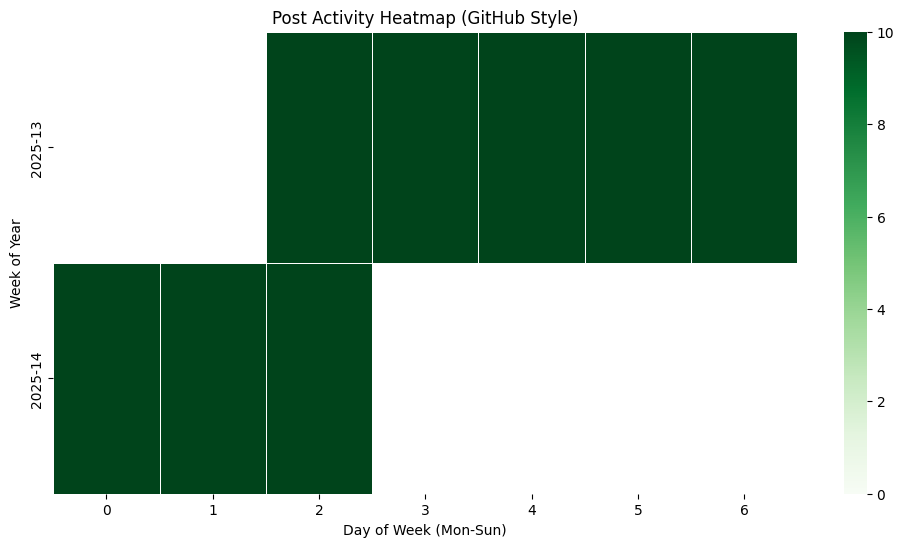

In [66]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(heatmap_data, cmap="Greens", linewidths=0.5, linecolor="white", vmin=0, vmax=10)
ax.set_xlabel("Day of Week (Mon-Sun)")
ax.set_ylabel("Week of Year")
ax.set_title("Post Activity Heatmap (GitHub Style)")

plt.show()

In [67]:
def get_top_comments(post_id, limit=100):
    """
    Function to fetch the top comments for a given Reddit post by post_id.
    """
    try:
        # Fetch the submission (post) using its ID
        submission = reddit.submission(id=post_id)
        
        # Get top comments (replace 'limit' with 200 to get the top 200 comments)
        submission.comments.replace_more(limit=0)  # Avoid "MoreComments" object
        top_comments = submission.comments.list()
        
        # Limit to the top 100 comments
        top_comments = top_comments[:limit]
        
        return [comment.body for comment in top_comments]  # Return the comment bodies
    
    except Exception as e:
        print(f"Error fetching comments for post {post_id}: {e}")
        return []

# Example to add top comments to your DataFrame
def run_func(df):
    top_comments_list = []
    for post_id in df['post_id']:
        if post_id:
            comments = get_top_comments(post_id)
        else:
            comments = []
        top_comments_list.append(comments)
    return top_comments_list

In [68]:
top_comments_list = run_func(df_filtered)

Fetching: GET https://oauth.reddit.com/comments/1jjyomf/ at 1743688467.3744261
Data: None
Params: {'limit': 2048, 'raw_json': 1, 'sort': 'confidence'}
Retrying due to ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))) status: GET https://oauth.reddit.com/comments/1jjyomf/
Sleeping: 0.81 seconds prior to retry
Fetching: GET https://oauth.reddit.com/comments/1jjyomf/ at 1743688468.342994
Data: None
Params: {'limit': 2048, 'raw_json': 1, 'sort': 'confidence'}
Response: 200 (5194 bytes) (rst-331:rem-999.0:used-1 ratelimit) at 1743688468.868109
Fetching: GET https://oauth.reddit.com/comments/1jjyskb/ at 1743688468.8715892
Data: None
Params: {'limit': 2048, 'raw_json': 1, 'sort': 'confidence'}
Response: 200 (5005 bytes) (rst-330:rem-998.0:used-2 ratelimit) at 1743688469.3261619
Fetching: GET https://oauth.reddit.com/comments/1jk0di6/ at 1743688469.3289669
Data: None
Params: {'limit': 2048, 'raw_json': 1, 'sort': 'confide

In [69]:
df_filtered['top_comments'] = top_comments_list

In [70]:
df_filtered

,post_id,title,body,author,upvotes,downvotes,score,num_comments,url,created_at,subreddit,date_created,is_relevant,year,week,day,top_comments
145,1jjyomf,Help recovering my Samourai Wallet?,A long time ago I had got myself some BTC in a...,haileliamen,2,0,2,22,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-03-26 00:11:46+00:00,BitcoinBeginners,2025-03-26,Yes.,2025,13,2,"[https://freedom.tech/samourai-to-sparrow/, Sc..."
148,1jjyskb,Look what I can buy with my bitcoin gift card,No text body (link post),eagle_eye_johnson,0,0,0,9,https://v.redd.it/jzzzrr26jvqe1,2025-03-26 00:16:57+00:00,btc,2025-03-26,Yes,2025,13,2,"[[removed], This really is the epitome of flog..."
150,1jk0di6,Bitcoin is Still Misunderstood,No text body (link post),InclineDumbbellPress,1237,0,1237,193,https://i.redd.it/xllts9e2txqe1.png,2025-03-26 01:33:07+00:00,CryptoCurrency,2025-03-26,Yes,2025,13,2,"[If you don't understand it, it's legit not to..."
153,1jk0qkj,First US Engineered Hydro-Cooled Bitcoin Miner...,No text body (link post),btcxio,5,0,5,3,https://news.bitcoinprotocol.org/first-us-engi...,2025-03-26 01:51:18+00:00,BitcoinMining,2025-03-26,Yes,2025,13,2,[I've talked to the Auradine team. Good people...
156,1jk33yu,You can remove money with only a send address?,"I may be crazy, but when I try to send Bitcoin...",Lonely_cricket143,36,0,36,23,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-03-26 03:56:00+00:00,BitcoinBeginners,2025-03-26,Yes,2025,13,2,[That doesn't sound right. You are saying the...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1jpyypr,Jack Mallers explains Bitcoin in 30 mins,One of the best and most enthusiastic explanat...,Bubbly_Ice3836,191,0,191,10,https://x.com/TFTC21/status/1894820980297519565,2025-04-02 20:29:39+00:00,Bitcoin,2025-04-02,Yes,2025,14,2,[YouTube mirror https://youtu.be/d7ID3fKAFQM?s...
1014,1jq1g1h,Bear Market,Trump just signed the tarrifs on middle east c...,CurrentAd8334,16,0,16,63,https://www.reddit.com/r/CryptoMarkets/comment...,2025-04-02 22:11:43+00:00,CryptoMarkets,2025-04-02,Yes.,2025,14,2,[Whales and institutions were buying BTC. Smar...
1015,1jq1gbt,Algorand currently has $410 million worth of s...,No text body (link post),gigabyteIO,154,0,154,22,https://app.rwa.xyz/stocks,2025-04-02 22:12:02+00:00,CryptoCurrency,2025-04-02,Yes,2025,14,2,"[Algo is the tits. Time to tak'em prime time,..."
1020,1jq2gq5,"They’re Shaking You Out—Stay Strong, Don’t Sell",As Tom Petty said—it’s free fallin’. Hold your...,AncientKey1976,77,0,77,147,https://www.reddit.com/r/CryptoMarkets/comment...,2025-04-02 22:56:11+00:00,CryptoMarkets,2025-04-02,Yes,2025,14,2,"[U can’t shake the DEAD, Can you guys look at ..."


In [71]:
df_filtered.to_parquet("../data/raw/reddit_relevant_posts_till_april.parquet")

In [72]:
df_filtered = pd.read_parquet('../data/raw/reddit_relevant_posts_till_april.parquet')

In [73]:
class Sentiment(BaseModel):
    """ Sentiment of Bitcoin outlook from the financial news"""
    sentiment: Literal["positive", "negative", "neutral"]

    @classmethod
    def from_response(cls, response: str):
        """Parse and validate response from Ollama"""
        try:
            normalized_response = response.strip().lower()  
            if normalized_response not in {"positive", "negative", "neutral"}:
                raise ValueError(f"Unexpected sentiment: {normalized_response}")
            return cls(sentiment=normalized_response)
        except (ValidationError, ValueError) as e:
            print(f"Error parsing response: {e}; Response: {response}")
            return cls(sentiment="neutral")  # fallback to neutral


In [74]:
slang_definitions = """
1. Stonk
Stonk means stock. The meme was a cheeky reference to making bad financial decisions, sort of like someone who cannot even pronounce stocks correctly.

2. Diamond Hands
The term “diamond hands” refers to holding on to a stock or option despite volatility and losses in the confidence that its price will eventually increase. On memes, the phrase is represented with emojis of a diamond and then hands. The term actually indicates risk taking, and is sometimes the folly of stubbornly holding on to a stock or option until the bitter end, even when the ship should have been abandoned long ago. Whether having diamond hands is good or bad will probably depend on the final outcome of the ticker symbol.

3. Tendies
Tendies is short for chicken tenders. The term moved to r/wallstreetbets where members used it self-deprecatingly in reference to their own living arrangements. Eventually, the term came to be associated with money or profit made from stock trading and options trading, which is how it’s most frequently used today.

4. YOLO
You only live once. This term actually seems to originate from the notion encapsulated in the Latin “carpe diem” (seize the day). In internet parlance, YOLO often humorously refers to an extremely risky choice that seems simultaneously laughable and dangerous. On Wallstreetbets, YOLO could apply to a trade where an investor puts in the majority of their capital—for instance, putting 95 percent of their account into Dogecoin.

5. HODL
HODL might seem to stand for Hold on For Dear Life, the encapsulated notion of which is also popularly expressed in the phrase Hold the Line. But actually, HODL really came about because of a typo for hold.

It all started on December 18th in 2013, when user GameKyuubi posted an inebriated, typo-filled, and only partially coherent internet rant about his poor trading skills, and how it would be better for people like himself to avoid day trading and stick to a buy and hold principle. The title of the post was I AM HODLING, and the rest is history. Images from Braveheart, 300, and Game of Thrones have provided the meme substance for promoters of the HODL principle—that is, avoid trading decisions based on short term swings, which can be simply ruinous for stock investors who do not know what they are doing. The HODL principle is particularly discussed in the cryptocurrency venue, where it contrasts against principles such as FOMO (the fear of missing out).

6. To the Moon
As you might guess, this term indicates that a given stock is going to have wild success in terms of its price increase, resulting in a lot of tendies for investors. In emojis, this phrase is indicated by rockets.

If you see a sizable number of community members using this phrase to discuss a ticker symbol, it might be something you want to pay attention to. Of course, there are certainly other factors as to whether or not that translates to tangible success beyond the reddit threads.

7. Apes Together Strong
Often represented with a gorilla emoji, the “apes together strong” phrase comes from Planet of the Apes. Apes are retail investors who feel bullish (optimistic) about a particular stock that is expected by short sellers to drop in price. If enough retail investors band together, they can be strong enough to drive up the price of the stock and defeat the goal of the short sellers, who want the price to fall.

Apes together strong encapsulates the idea of the proverbial little man uniting with other everyday people to defeat more powerful institutional investors.

8. Bears
A bear investor is one who feels bearish about a particular stock (or even the stock market in general). They are somewhat of a debbie downer on the r/wallstreetbets forum, and may become the butt end of jokes and insults, since most community members are looking for that next stock or cryptocurrency to go to the moon.

Tangentially, the phrases bear market and bull market relate to whether the market is going up and down. Since bears strike by coming down on their target, a bear market suggests decreasing stock prices. Because bulls gore their target by moving their horns upward, a bull market suggests increasing prices.

9. Buy High Sell Low
This is a joke about losses, expressed in a joking reference to the traditional, sensible, and simple advice of buy low and sell high. Someone who bought high and sold low has failed miserably at turning a particular trade into something financially profitable, leaving them at the mercy of jabs from other community members.

10. Buy the Dip
For members who feel overall bullish about a particular stop, slight dips in its generally upward price are a momentary respite to buy the stock at a discount. Buying the dip expresses this timely trade, and is often paired with Diamond Hands and To the Moon for a potent meme trio.

11. Paper Hands
Paper hands are the opposite of diamond hands, referencing traders who unload their shares at the first sign of bad news. As you can imagine, the connotation here is somewhat negative in its indication of a trader who acts too quickly, out of fear.

12. We Like the Stock
This phrase comes from Jim Cramer, who was the host of Mad Money on CNBC. The simple phrase is used to indicate a favorable attitude toward holding a stock, much in the same way that Cramer would have used the phrase. 

Use these definitions when analyzing the sentiment of the comments 
"""



In [75]:
def get_sentiment(post_title, post_body, comments):
    prompt = f"""

    {slang_definitions}
    
    Given the title and body of a post and a list of comments in response, analyze the overall sentiment of the comments to determine if the general outlook on Bitcoin or BTC is positive, negative, or neutral.

    Post Title: "{post_title}"
    Post Body: "{post_body}"
    Comments:
    {comments}

    Provide a single-word label: positive, negative, or neutral in lowercase.
    Only return the label without additional text.

    """

    response = ollama.chat(model=model_name, messages=[{"role": "user", "content": prompt}])
    print(response)
    return Sentiment.from_response(response["message"]["content"])

In [76]:
df_filtered["overall_sentiment"] = df_filtered.apply(lambda row: get_sentiment(row["title"], row["body"], row["top_comments"]), axis=1)

model='llama3.2' created_at='2025-04-03T14:03:06.497016Z' done=True done_reason='stop' total_duration=8214816750 load_duration=1488704000 prompt_eval_count=2048 prompt_eval_duration=6687710125 eval_count=2 eval_duration=37145959 message=Message(role='assistant', content='neutral', images=None, tool_calls=None)
model='llama3.2' created_at='2025-04-03T14:03:09.52934Z' done=True done_reason='stop' total_duration=3022466417 load_duration=13073042 prompt_eval_count=1698 prompt_eval_duration=2983009917 eval_count=2 eval_duration=25206583 message=Message(role='assistant', content='negative', images=None, tool_calls=None)
model='llama3.2' created_at='2025-04-03T14:03:13.337791Z' done=True done_reason='stop' total_duration=3806092167 load_duration=11048375 prompt_eval_count=2048 prompt_eval_duration=3741413375 eval_count=2 eval_duration=52968375 message=Message(role='assistant', content='neutral', images=None, tool_calls=None)
model='llama3.2' created_at='2025-04-03T14:03:15.862206Z' done=True 

In [77]:
df_filtered["overall_sentiment"] = df_filtered["overall_sentiment"].apply(lambda x: x.sentiment if isinstance(x, Sentiment) else x)

In [78]:
df_filtered

,post_id,title,body,author,upvotes,downvotes,score,num_comments,url,created_at,subreddit,date_created,is_relevant,year,week,day,top_comments,overall_sentiment
145,1jjyomf,Help recovering my Samourai Wallet?,A long time ago I had got myself some BTC in a...,haileliamen,2,0,2,22,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-03-26 00:11:46+00:00,BitcoinBeginners,2025-03-26,Yes.,2025,13,2,"[https://freedom.tech/samourai-to-sparrow/, Sc...",neutral
148,1jjyskb,Look what I can buy with my bitcoin gift card,No text body (link post),eagle_eye_johnson,0,0,0,9,https://v.redd.it/jzzzrr26jvqe1,2025-03-26 00:16:57+00:00,btc,2025-03-26,Yes,2025,13,2,"[[removed], This really is the epitome of flog...",negative
150,1jk0di6,Bitcoin is Still Misunderstood,No text body (link post),InclineDumbbellPress,1237,0,1237,193,https://i.redd.it/xllts9e2txqe1.png,2025-03-26 01:33:07+00:00,CryptoCurrency,2025-03-26,Yes,2025,13,2,"[If you don't understand it, it's legit not to...",neutral
153,1jk0qkj,First US Engineered Hydro-Cooled Bitcoin Miner...,No text body (link post),btcxio,5,0,5,3,https://news.bitcoinprotocol.org/first-us-engi...,2025-03-26 01:51:18+00:00,BitcoinMining,2025-03-26,Yes,2025,13,2,[I've talked to the Auradine team. Good people...,neutral
156,1jk33yu,You can remove money with only a send address?,"I may be crazy, but when I try to send Bitcoin...",Lonely_cricket143,36,0,36,23,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-03-26 03:56:00+00:00,BitcoinBeginners,2025-03-26,Yes,2025,13,2,[That doesn't sound right. You are saying the...,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1jpyypr,Jack Mallers explains Bitcoin in 30 mins,One of the best and most enthusiastic explanat...,Bubbly_Ice3836,191,0,191,10,https://x.com/TFTC21/status/1894820980297519565,2025-04-02 20:29:39+00:00,Bitcoin,2025-04-02,Yes,2025,14,2,[YouTube mirror https://youtu.be/d7ID3fKAFQM?s...,neutral
1014,1jq1g1h,Bear Market,Trump just signed the tarrifs on middle east c...,CurrentAd8334,16,0,16,63,https://www.reddit.com/r/CryptoMarkets/comment...,2025-04-02 22:11:43+00:00,CryptoMarkets,2025-04-02,Yes.,2025,14,2,[Whales and institutions were buying BTC. Smar...,neutral
1015,1jq1gbt,Algorand currently has $410 million worth of s...,No text body (link post),gigabyteIO,154,0,154,22,https://app.rwa.xyz/stocks,2025-04-02 22:12:02+00:00,CryptoCurrency,2025-04-02,Yes,2025,14,2,"[Algo is the tits. Time to tak'em prime time,...",neutral
1020,1jq2gq5,"They’re Shaking You Out—Stay Strong, Don’t Sell",As Tom Petty said—it’s free fallin’. Hold your...,AncientKey1976,77,0,77,147,https://www.reddit.com/r/CryptoMarkets/comment...,2025-04-02 22:56:11+00:00,CryptoMarkets,2025-04-02,Yes,2025,14,2,"[U can’t shake the DEAD, Can you guys look at ...",neutral


In [79]:
sentiment_mapping = {"positive": 1, "negative": -1, "neutral": 0}
df_filtered["sentiment_score"] = df_filtered["overall_sentiment"].map(sentiment_mapping)

iso_calendar = df_filtered['date_created'].dt.isocalendar()
df_filtered['year'] = iso_calendar.year  # Use ISO year instead of dt.year
df_filtered['week'] = iso_calendar.week
df_filtered['day'] = df_filtered['date_created'].dt.dayofweek

heatmap_data_2 = df_filtered.groupby(["year", "week", "day"])["sentiment_score"].mean().unstack()

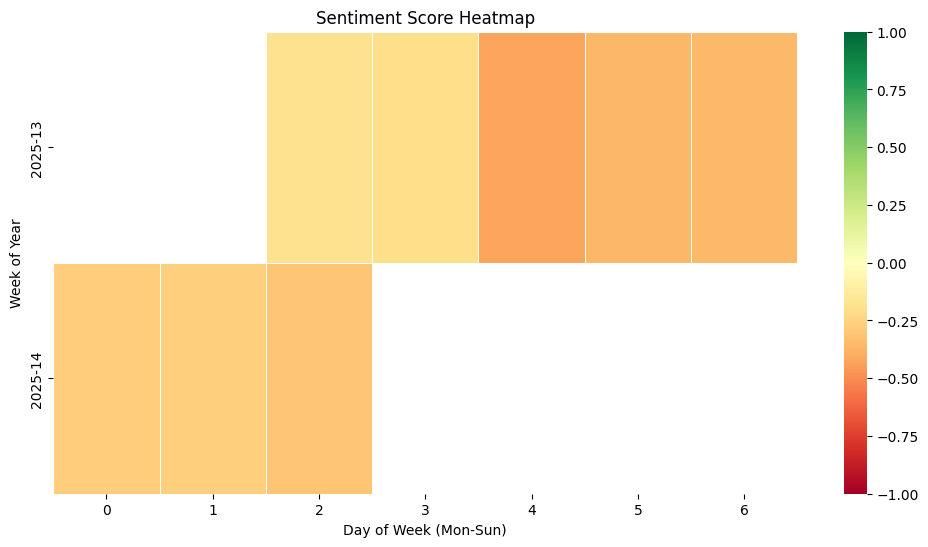

In [80]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(heatmap_data_2, cmap="RdYlGn", linewidths=0.5, linecolor="white", center=0, vmin=-1, vmax=1)
ax.set_xlabel("Day of Week (Mon-Sun)")
ax.set_ylabel("Week of Year")
ax.set_title("Sentiment Score Heatmap")
plt.show()

In [81]:
df_filtered.to_parquet('../data/processed/reddit_relevant_posts_till_april_sentiment.parquet', index=False)

In [20]:
rate_limit_info = reddit.auth.limits
print(rate_limit_info)

NameError: name 'reddit' is not defined

In [21]:
from datetime import datetime

reset_time = pd.to_datetime(rate_limit_info['reset_timestamp'],unit = "s",utc = True).tz_convert("Asia/Singapore")  # Convert to UTC time
print("Rate limit resets at (SGT):", reset_time.strftime('%Y-%m-%d %H:%M:%S %Z'))

NameError: name 'rate_limit_info' is not defined

In [ ]:
df_filtered.to_csv(r'..\data\processed\reddit_relevant_posts_with_sentiment.csv', index=False)